# SIFT Implementation with OpenCV

This notebook demonstrates how to use OpenCV's SIFT implementation to:
1. Detect SIFT keypoints
2. Visualize the keypoints
3. Match keypoints between images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Image and Initialize SIFT

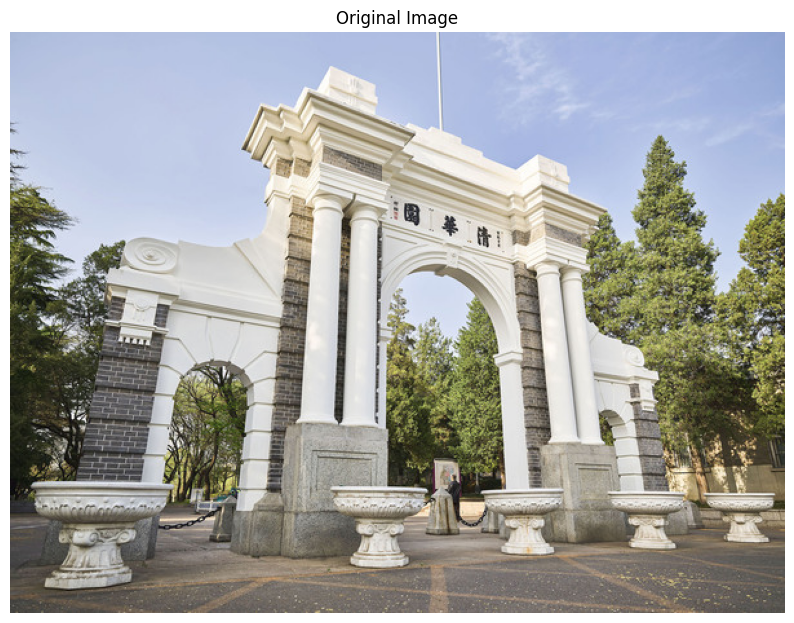

In [2]:
# Load image
img_path = 'src/problem1_sift/school_gate.jpeg'  # Adjust path as needed
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Show the original image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

## 2. Detect SIFT Keypoints

In [5]:
# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

print(f"Number of keypoints detected: {len(keypoints)}; shape: {keypoints[50].pt if keypoints else 'None'}")
print(f"Descriptor shape: {descriptors.shape if descriptors is not None else 'None'}")

Number of keypoints detected: 1923; shape: (23.552875518798828, 162.22122192382812)
Descriptor shape: (1923, 128)


## 3. Visualize Keypoints

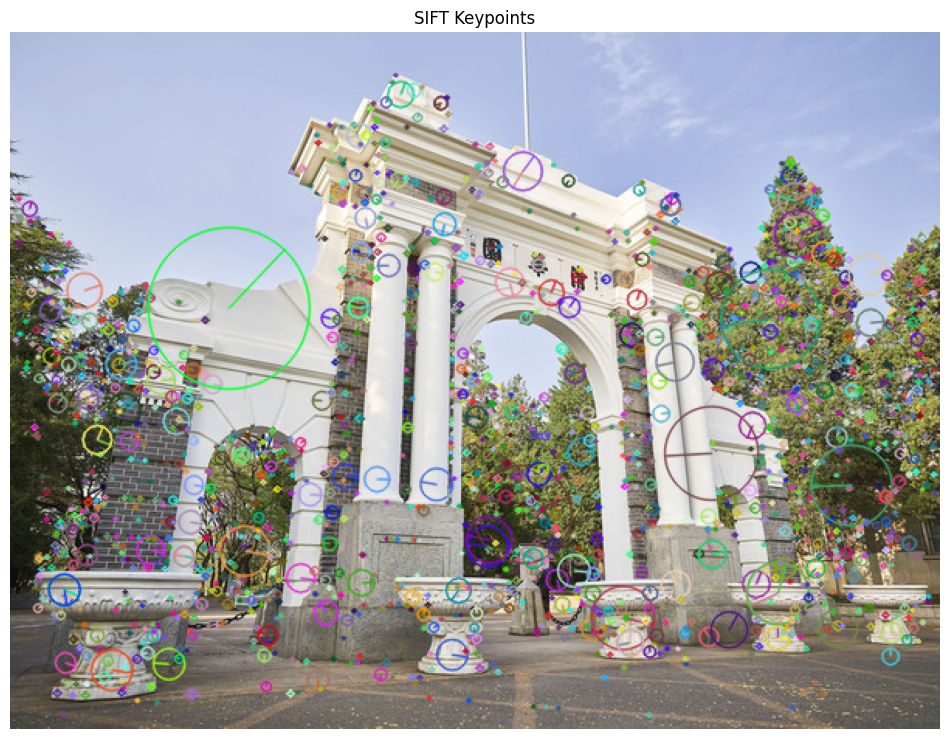

In [4]:
# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(img_rgb, keypoints, None, 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the image with keypoints
plt.figure(figsize=(12, 10))
plt.imshow(img_keypoints)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

## 4. Match Keypoints Between Images

Let's load a second image (or a transformed version of the first image) and match the keypoints.

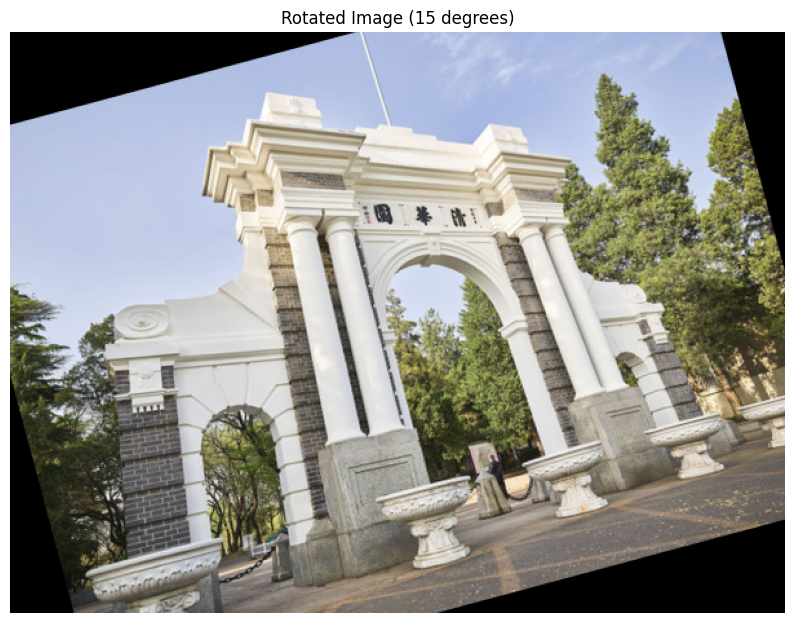

In [5]:
# For testing, let's create a rotated version of the original image
# You can replace this with another image of your choice

def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (width, height))

# Create a rotated version of the image
img2 = rotate_image(img, 15)  # Rotate by 15 degrees
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Show the second image
plt.figure(figsize=(10, 8))
plt.imshow(img2_rgb)
plt.title('Rotated Image (15 degrees)')
plt.axis('off')
plt.show()

In [7]:
# Detect keypoints in the second image
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

print(f"Number of keypoints in second image: {len(keypoints2)}")
print(f"Descriptor shape: {descriptors.shape if descriptors is not None else 'None'}")

Number of keypoints in second image: 2420
Descriptor shape: (1923, 128)


In [11]:
# Match descriptors between the two images
# FLANN (Fast Library for Approximate Nearest Neighbors) matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Higher checks value gives better accuracy at the cost of time

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors, descriptors2, k=2)

# Apply Lowe's ratio test to get good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:  # Ratio threshold (can be adjusted)
        good_matches.append(m)

print(f"Number of matches: {len(matches)}")
print(f"Number of good matches: {len(good_matches)}")

Number of matches: 1923
Number of good matches: 1232


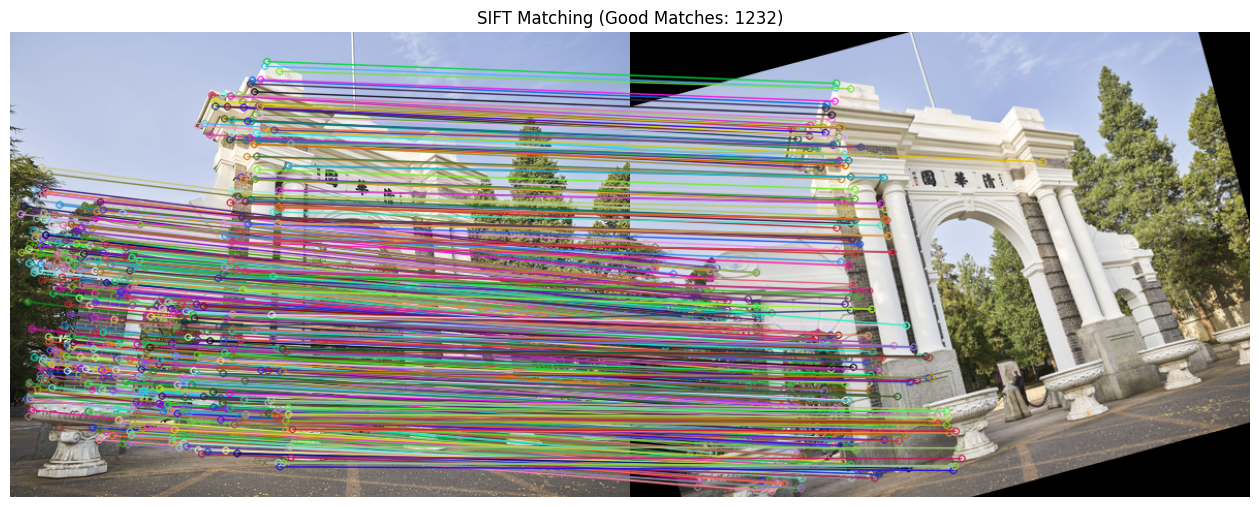

In [14]:
# Draw the matches
img_matches = cv2.drawMatches(img_rgb, keypoints, img2_rgb, keypoints2, good_matches[:500], None, 
                             flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(16, 12))
plt.imshow(img_matches)
plt.title(f'SIFT Matching (Good Matches: {len(good_matches)})')
plt.axis('off')
plt.show()

## 5. Try with Your Own Images

You can load your own images and test the SIFT feature detection and matching.

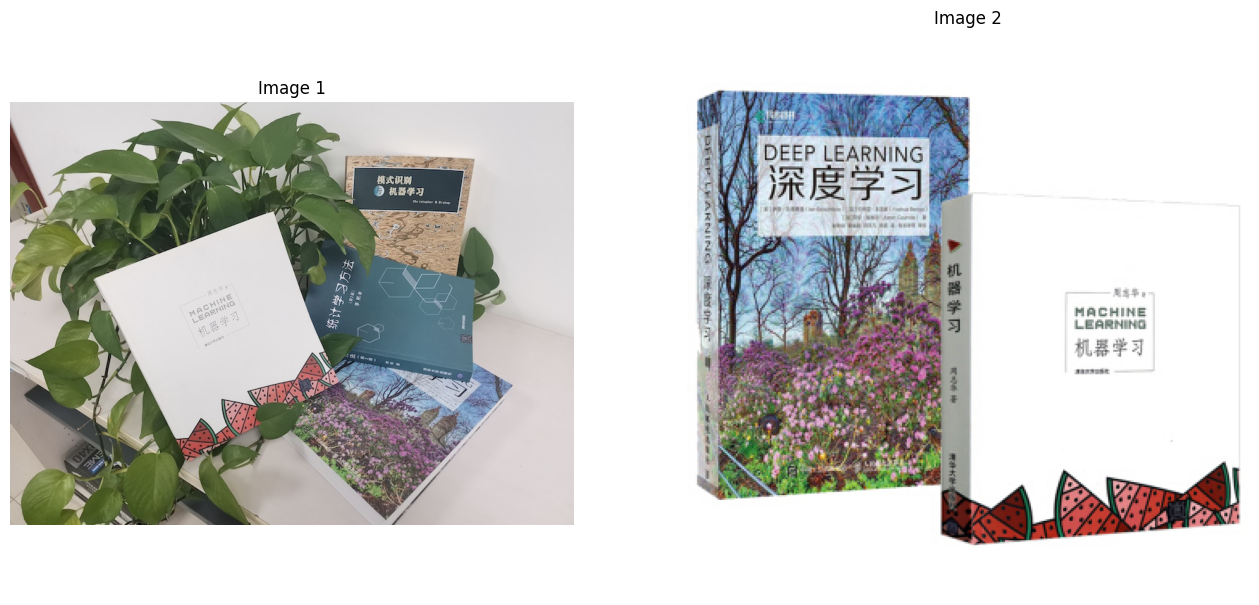

In [22]:
# Load two of your own images
# Replace these paths with your image paths
own_img1_path = "books1.jpeg"
own_img2_path = "books2.jpeg"

# Comment out the following section if you don't have your own images yet

own_img1 = cv2.imread(own_img1_path)
own_img1_rgb = cv2.cvtColor(own_img1, cv2.COLOR_BGR2RGB)

own_img2 = cv2.imread(own_img2_path)
own_img2_rgb = cv2.cvtColor(own_img2, cv2.COLOR_BGR2RGB)

# Show the images
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(own_img1_rgb)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(own_img2_rgb)
plt.title('Image 2')
plt.axis('off')
plt.show()


Number of keypoints in image 1: 1989
Number of keypoints in image 2: 994
Descriptor shape for image 1: (1989, 128)
Descriptor shape for image 2: (994, 128)
Number of matches: 1989
Number of good matches: 156


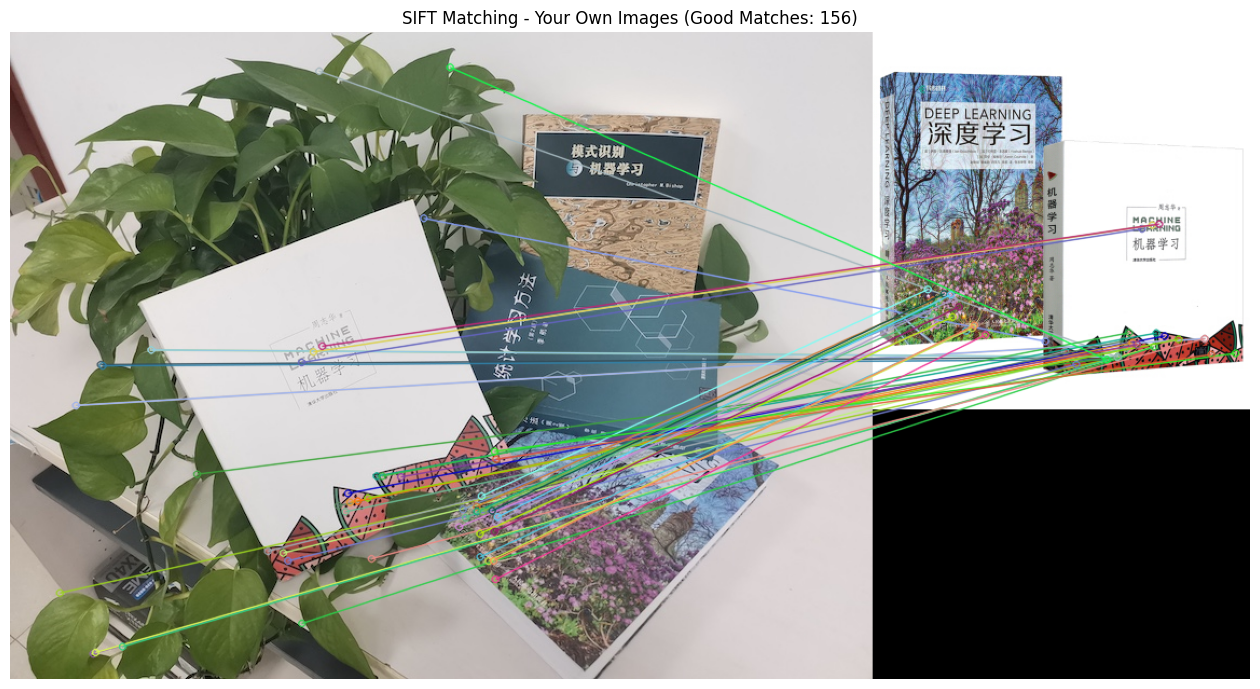

In [24]:
# Detect and match keypoints between your own images
# Uncomment this section when you have your own images

# Detect keypoints
own_kp1, own_desc1 = sift.detectAndCompute(own_img1, None)
own_kp2, own_desc2 = sift.detectAndCompute(own_img2, None)
print(f"Number of keypoints in image 1: {len(own_kp1)}")
print(f"Number of keypoints in image 2: {len(own_kp2)}")
print(f"Descriptor shape for image 1: {own_desc1.shape if own_desc1 is not None else 'None'}")
print(f"Descriptor shape for image 2: {own_desc2.shape if own_desc2 is not None else 'None'}")

# Match keypoints
flann = cv2.FlannBasedMatcher(index_params, search_params)
own_matches = flann.knnMatch(own_desc1, own_desc2, k=2)
print(f"Number of matches: {len(own_matches)}")

# Apply ratio test
own_good_matches = []
for m, n in own_matches:
    if m.distance < 0.7 * n.distance:
        own_good_matches.append(m)
print(f"Number of good matches: {len(own_good_matches)}")

# Draw matches
own_img_matches = cv2.drawMatches(own_img1_rgb, own_kp1, own_img2_rgb, own_kp2, own_good_matches[:50], None,
                                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(16, 12))
plt.imshow(own_img_matches)
plt.title(f'SIFT Matching - Your Own Images (Good Matches: {len(own_good_matches)})')
plt.axis('off')
plt.show()


## 6. Conclusion

This notebook demonstrated how to use OpenCV's built-in SIFT implementation to:
1. Detect keypoints in images
2. Visualize these keypoints
3. Match keypoints between images

SIFT is rotation, scale, and illumination invariant, making it a powerful feature detector for computer vision tasks.